# Introduction
Research suggests that speech production can be modeled as a nonlinear dynamical system, wherein small perturbations in the interaction of its parts give rise to chaotic yet deterministic behavior. Parkinson's-related impairments (e.g. tremors, etc.) to the vocal organs, muscles and nerves can affect dynamics of the entire system, suggesting that nonlinear measures  may benefit the prediction of disease stage from voice recordings. 

## Features extracted
  * **shimmer** - extent of variation in amplitude from vocal cycle to vocal cycle
  * **harmonics-to-noise (HTN)** -  tonal components of speech signal relative to amplitude of noise
  * **jitter** - measures pitch variation, such as vibrato and microtremor; calculated as differences in absolute frequencies of each cycle, averaged over a number of cycles
  * **pitch** - Pitch is the quality that allows us to classify a sound as relatively high or low. Pitch is determined by the frequency of sound wave vibrations.
      - *Note*: Natural pitch variation exists in healthy individuals, but may be perturbed in those with vocal impairments secondary to Parkinson's. 
  
      
### Target feature:

We will predict presence or abscence of parkinson's disease in the given voice samples

# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings 
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()
pd.options.display.max_columns=None

since the data is in a text file, we need to manually provide the column names. The following was given in the metadata of the file<br>
column 1: Subject id<br>
colum 2-27: features <br>
features 1-5: Jitter (local),Jitter (local, absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp), <br>
features 6-11: Shimmer (local),Shimmer (local, dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda), <br>
features 12-14: AC,NTH,HTN, <br>
features 15-19: Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch, <br>
features 20-23: Number of pulses,Number of periods,Mean period,Standard deviation of period, features 24-26: Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks <br>
column 28: UPDRS <br>
column 29: class information <br>

In [2]:
data_path = '../Data/classification/'
col_names = "subject_id,Jitter (local),Jitter (local. absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local. dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information".split(',')
df = pd.read_csv(data_path+"train_data.txt",names=col_names)
df

subject_id  Jitter (local)  Jitter (local. absolute)  Jitter (rap)  \
0              1           1.488                  0.000090         0.900   
1              1           0.728                  0.000038         0.353   
2              1           1.220                  0.000074         0.732   
3              1           2.502                  0.000123         1.156   
4              1           3.509                  0.000167         1.715   
5              1           2.470                  0.000126         1.358   
6              1           1.583                  0.000082         0.768   
7              1           1.920                  0.000099         0.926   
8              1           2.257                  0.000119         1.239   
9              1           1.594                  0.000085         0.850   
10             1           2.286                  0.000122         1.081   
11             1           1.728                  0.000093         0.807   
12             1           2.105                  0.000110         0.902   
13             1           3.343                  0.000164         1.349   
14             1           2.025                  0.000099         1.028   
15             1           2.517                  0.000118         1.160   
16             1           3.290                  0.000149         1.567   
17             1           5.534                  0.000258         2.380   
18             1           1.137                  0.000054         0.473   
19             1           2.162                  0.000099         1.217   
20             1           1.533                  0.000076         0.462   
21             1           2.783                  0.000135         1.221   
22             1           3.999                  0.000188         1.928   
23             1           2.227                  0.000106         1.014   
24             1           1.728                  0.000079         0.811   
25             1           2.638                  0.000124         1.418   
26             2           0.427                  0.000034         0.243   
27             2           0.844                  0.000069         0.509   
28             2           1.264                  0.000101         0.791   
29             2           2.877                  0.000244         1.250   
...          ...             ...                       ...           ...   
1010          39           2.072                  0.000110         0.992   
1011          39           0.608                  0.000033         0.313   
1012          39           2.361                  0.000128         1.281   
1013          39           2.398                  0.000150         1.383   
1014          40           0.471                  0.000034         0.186   
1015          40           4.319                  0.000317         2.774   
1016          40           1.543                  0.000103         1.004   
1017          40           2.864                  0.000212         1.108   
1018          40           3.878                  0.000301         1.795   
1019          40           3.453                  0.000267         1.690   
1020          40           2.049                  0.000154         0.600   
1021          40           1.441                  0.000105         0.437   
1022          40           3.602                  0.000280         1.804   
1023          40           2.680                  0.000207         1.010   
1024          40           1.927                  0.000135         0.762   
1025          40           2.385                  0.000163         1.048   
1026          40           2.461                  0.000216         1.008   
1027          40           3.329                  0.000194         1.788   
1028          40           2.156                  0.000151         0.964   
1029          40           3.228                  0.000223         1.445   
1030          40           4.340                  0.00

# Exploratory Data Analysis

## Descriptive statistics and data cleaning

In [3]:
df.head()

subject_id  Jitter (local)  Jitter (local. absolute)  Jitter (rap)  \
0           1           1.488                  0.000090         0.900   
1           1           0.728                  0.000038         0.353   
2           1           1.220                  0.000074         0.732   
3           1           2.502                  0.000123         1.156   
4           1           3.509                  0.000167         1.715   

   Jitter (ppq5)  Jitter (ddp)  Shimmer (local)  Shimmer (local. dB)  \
0          0.794         2.699            8.334                0.779   
1          0.376         1.059            5.864                0.642   
2          0.670         2.196            8.719                0.875   
3          1.634         3.469           13.513                1.273   
4          1.539         5.145            9.112                1.040   

   Shimmer (apq3)  Shimmer (apq5)   Shimmer (apq11)  Shimmer (dda)        AC  \
0           4.517           4.609             6.802         13.551  0.905905   
1           2.058           3.180             7.194          6.175  0.951285   
2           4.347           5.166             7.548         13.040  0.911508   
3           5.263           8.771            16.779         15.789  0.901302   
4           3.102           4.927            12.823          9.307  0.856907   

        NTH     HTN  Median pitch  Mean pitch  Standard deviation  \
0  0.119116  11.130       166.533     164.781              10.421   
1  0.066758  17.403       195.252     193.289              14.773   
2  0.109983  12.212       158.689     164.768              12.981   
3  0.121982  11.384       201.997     203.471              10.853   
4  0.236831  10.653       211.887     208.440              11.499   

   Minimum pitch  Maximum pitch  Number of pulses  Number of periods  \
0        142.229        187.576               160                159   
1        159.515        234.505               170                169   
2        146.445        211.442              1431               1427   
3        182.713        220.230                94                 92   
4        182.821        225.162               117                114   

   Mean period  Standard deviation of period  \
0     0.006065                      0.000416   
1     0.005181                      0.000403   
2     0.006071                      0.000474   
3     0.004910                      0.000320   
4     0.004757                      0.000380   

   Fraction of locally unvoiced frames  Number of voice breaks  \
0                                0.000                       0   
1                                2.247                       0   
2                               10.656                       1   
3                                0.000                       0   
4                               18.182                       1   

   Degree of voice breaks  UPDRS  class information  
0                   0.000     23                  1  
1                   0.000     23                  1  
2                   0.178     23                  1  
3                   0.000     23                  1  
4                  13.318     23                  1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
subject_id                             1040 non-null int64
Jitter (local)                         1040 non-null float64
Jitter (local. absolute)               1040 non-null float64
Jitter (rap)                           1040 non-null float64
Jitter (ppq5)                          1040 non-null float64
Jitter (ddp)                           1040 non-null float64
Shimmer (local)                        1040 non-null float64
Shimmer (local. dB)                    1040 non-null float64
Shimmer (apq3)                         1040 non-null float64
Shimmer (apq5)                         1040 non-null float64
 Shimmer (apq11)                       1040 non-null float64
Shimmer (dda)                          1040 non-null float64
AC                                     1040 non-null float64
NTH                                    1040 non-null float64
HTN                                    10

In [5]:
df.describe()

subject_id  Jitter (local)  Jitter (local. absolute)  Jitter (rap)  \
count  1040.00000     1040.000000               1040.000000   1040.000000   
mean     20.50000        2.679523                  0.000170      1.247053   
std      11.54895        1.765053                  0.000106      0.979462   
min       1.00000        0.190000                  0.000006      0.062000   
25%      10.75000        1.507500                  0.000095      0.617000   
50%      20.50000        2.396000                  0.000151      1.035500   
75%      30.25000        3.411500                  0.000229      1.602500   
max      40.00000       14.376000                  0.000777      8.016000   

       Jitter (ppq5)  Jitter (ddp)  Shimmer (local)  Shimmer (local. dB)  \
count    1040.000000   1040.000000      1040.000000          1040.000000   
mean        1.348327      3.741161        12.918391             1.194895   
std         1.138742      2.938443         5.452204             0.420071   
min         0.081000      0.185000         1.185000             0.103000   
25%         0.665750      1.851750         9.353500             0.941000   
50%         1.126500      3.107000        12.348500             1.181500   
75%         1.694750      4.808500        15.493250             1.411000   
max        13.542000     24.048000        41.137000             2.721000   

       Shimmer (apq3)  Shimmer (apq5)   Shimmer (apq11)  Shimmer (dda)  \
count     1040.000000     1040.000000       1040.000000    1040.000000   
mean         5.699600        7.983552         12.215345      17.098839   
std          3.015183        4.840892          6.016261       9.045537   
min          0.496000        0.708000          0.517000       1.488000   
25%          3.703000        5.160250          8.079500      11.109500   
50%          5.134500        7.050500         11.418659      15.403000   
75%          6.942000        9.558930         15.306125      20.826000   
max         25.820000       72.860000         44.764000      77.459000   

                AC          NTH          HTN  Median pitch   Mean pitch  \
count  1040.000000  1040.000000  1040.000000   1040.000000  1040.000000   
mean      0.846013     0.231379     9.999542    163.368286   168.727621   
std       0.085709     0.151283     4.291304     56.021678    55.969913   
min       0.539566     0.002106     0.695000     81.460000    82.363000   
25%       0.803026     0.126890     7.510250    124.075750   126.594750   
50%       0.856899     0.206196     9.638000    150.636000   154.732500   
75%       0.904218     0.297583    12.087250    192.476750   201.220500   
max       0.997904     0.869277    28.418000    468.618000   470.456000   

       Standard deviation  Minimum pitch  Maximum pitch  Number of pulses  \
count         1040.000000    1040.000000    1040.000000       1040.000000   
mean            27.547629     134.538101     234.875990        109.744231   
std             36.672624      47.058058     121.541243        150.027703   
min              0.533000      67.957000      85.541000          0.000000   
25%              7.295500     100.852250     143.650750         42.750000   
50%             12.773500     127.277000     195.971000         65.000000   
75%             27.553000     159.664750     263.798250        113.000000   
max            293.877000     452.083000     597.974000       1490.000000   

       Number of periods  Mean period  Standard deviation of period  \
count        1040.000000  1040.000000                   1040.000000   
mean          105.969231     0.006547                      0.000843   
std           149.417074     0.001875                      0.000723   
min             0.000000     0.002039                      0.000055   
25%            40.750000     0.005039                      0.000404   
50%            62.000000     0.006484                      0.000644   
75%           109.000000     0.007923                      0.000980   
max          1489.00000

[]

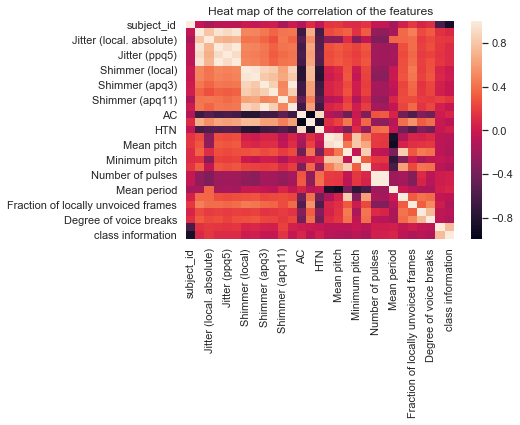

In [6]:
corr = df.corr()
sns.heatmap(corr)
plt.title("Heat map of the correlation of the features")
plt.plot()

The distribution of the people with and without disease is exactly half:-

In [7]:
df["class information"].value_counts()

1    520
0    520
Name: class information, dtype: int64

Since we were unable to extract certain vocal features, we had to drop several columns and make do with what we could extract.

Apart from vocal features, we drop subject id, because we cannot use this

In [8]:
columns_to_drop = "subject_id,AC,NTH,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks".split(',')

def to_target(val):
    '''
    Converting class 0 and 1 to False and true respectively
    '''
    if val==0:
        return False
    return True
df.UPDRS = df.UPDRS.astype('float')
df_new = df.drop(columns=columns_to_drop)
df_new["class_information"] = df_new["class information"].apply(to_target)
df_new.drop(columns=['class information'],inplace=True)
df_new

Jitter (local)  Jitter (local. absolute)  Jitter (rap)  Jitter (ppq5)  \
0              1.488                  0.000090         0.900          0.794   
1              0.728                  0.000038         0.353          0.376   
2              1.220                  0.000074         0.732          0.670   
3              2.502                  0.000123         1.156          1.634   
4              3.509                  0.000167         1.715          1.539   
5              2.470                  0.000126         1.358          1.341   
6              1.583                  0.000082         0.768          0.864   
7              1.920                  0.000099         0.926          1.031   
8              2.257                  0.000119         1.239          1.530   
9              1.594                  0.000085         0.850          0.951   
10             2.286                  0.000122         1.081          1.257   
11             1.728                  0.000093         0.807          1.056   
12             2.105                  0.000110         0.902          1.076   
13             3.343                  0.000164         1.349          1.826   
14             2.025                  0.000099         1.028          1.251   
15             2.517                  0.000118         1.160          1.350   
16             3.290                  0.000149         1.567          1.822   
17             5.534                  0.000258         2.380          3.171   
18             1.137                  0.000054         0.473          0.608   
19             2.162                  0.000099         1.217          1.059   
20             1.533                  0.000076         0.462          0.340   
21             2.783                  0.000135         1.221          1.338   
22             3.999                  0.000188         1.928          2.231   
23             2.227                  0.000106         1.014          1.418   
24             1.728                  0.000079         0.811          0.820   
25             2.638                  0.000124         1.418          1.477   
26             0.427                  0.000034         0.243          0.249   
27             0.844                  0.000069         0.509          0.489   
28             1.264                  0.000101         0.791          0.676   
29             2.877                  0.000244         1.250          1.323   
...              ...                       ...           ...            ...   
1010           2.072                  0.000110         0.992          1.029   
1011           0.608                  0.000033         0.313          0.436   
1012           2.361                  0.000128         1.281          1.371   
1013           2.398                  0.000150         1.383          1.753   
1014           0.471                  0.000034         0.186          0.230   
1015           4.319                  0.000317         2.774          1.708   
1016           1.543                  0.000103         1.004          0.648   
1017           2.864                  0.000212         1.108          1.147   
1018           3.878                  0.000301         1.795          1.675   
1019           3.453                  0.000267         1.690          2.003   
1020           2.049                  0.000154         0.600          0.895   
1021           1.441                  0.000105         0.437          0.400   
1022           3.602                  0.000280         1.804          1.790   
1023           2.680                  0.000207         1.010          1.057   
1024           1.927                  0.000135         0.762          0.651   
1025           2.385                  0.000163         1.048          1.098   
1026           2.461                  0.000216         1.008          0.999   
1027           3.329                  0.000194         1.788          2.073   
1028           2.156                  0.000151         0

In [9]:
del(df)

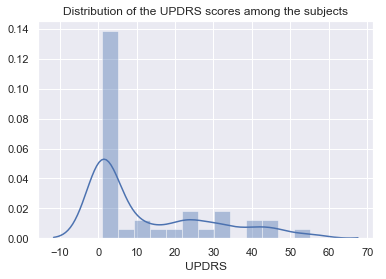

In [10]:
sns.distplot(df_new["UPDRS"])
plt.title("Distribution of the UPDRS scores among the subjects")
plt.show()

We can notice that most subjects have a UPDRS score less than 5 while the rest are above that. This is because half of the data consists of subjects without parkinsons's disease(PD). We can consider a subject to not have PD if his UPDRS score is less than 5.

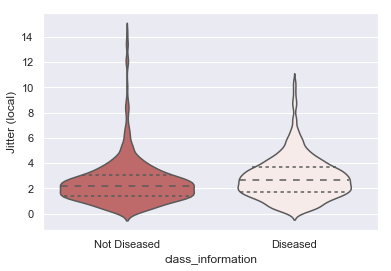

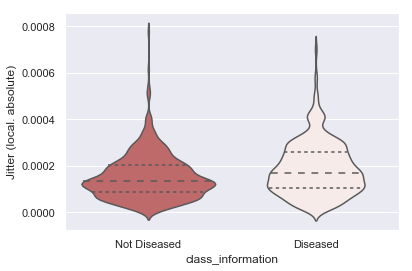

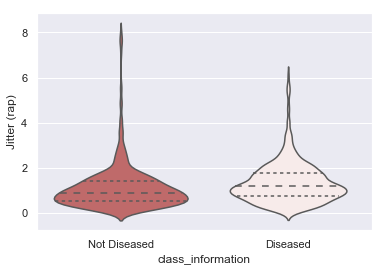

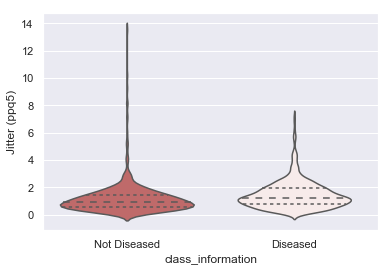

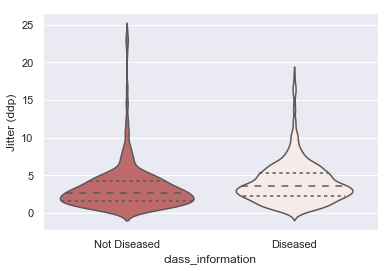

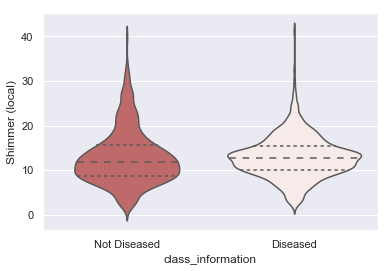

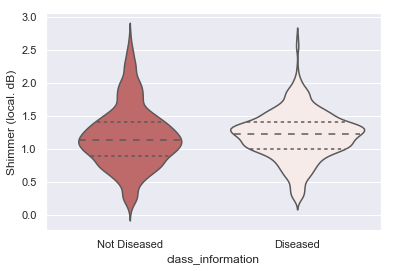

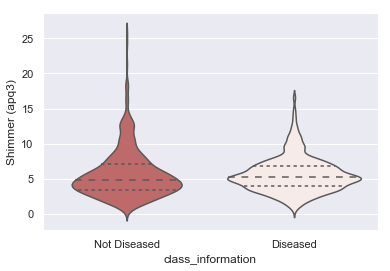

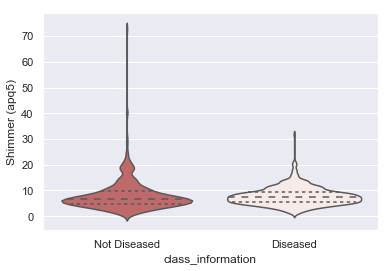

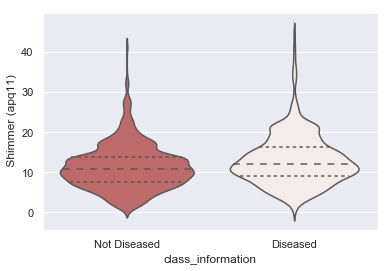

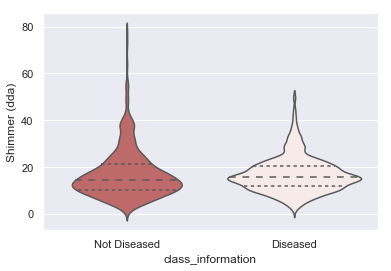

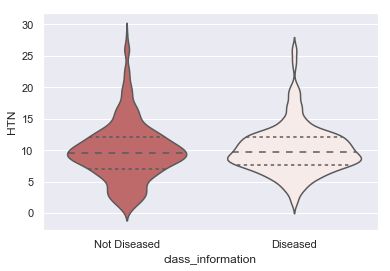

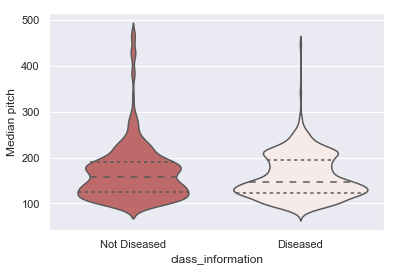

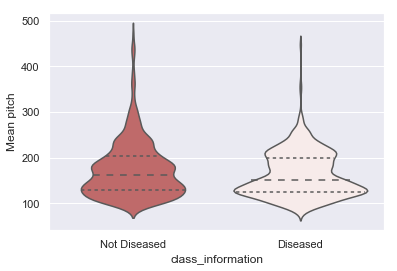

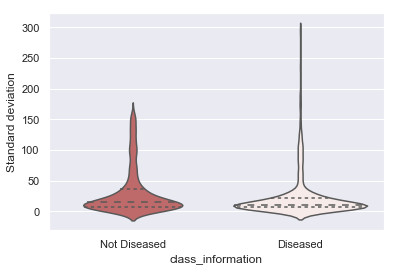

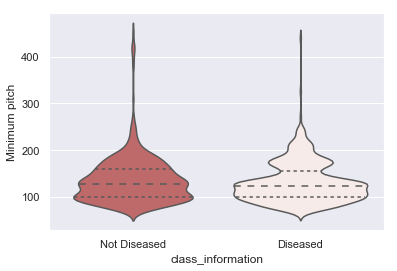

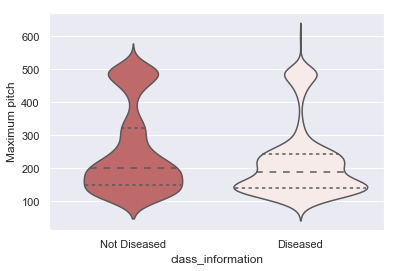

In [11]:
for z in df_new.drop(columns=['class_information','UPDRS']).columns:
    ax = sns.violinplot(x="class_information", y=z,  bw=.2, palette={True: "#f9e9e8", False: "#CD5C5C"}, inner="quartile", data=df_new)
    ax.set_xticklabels(['Not Diseased', 'Diseased'])
    plt.show()

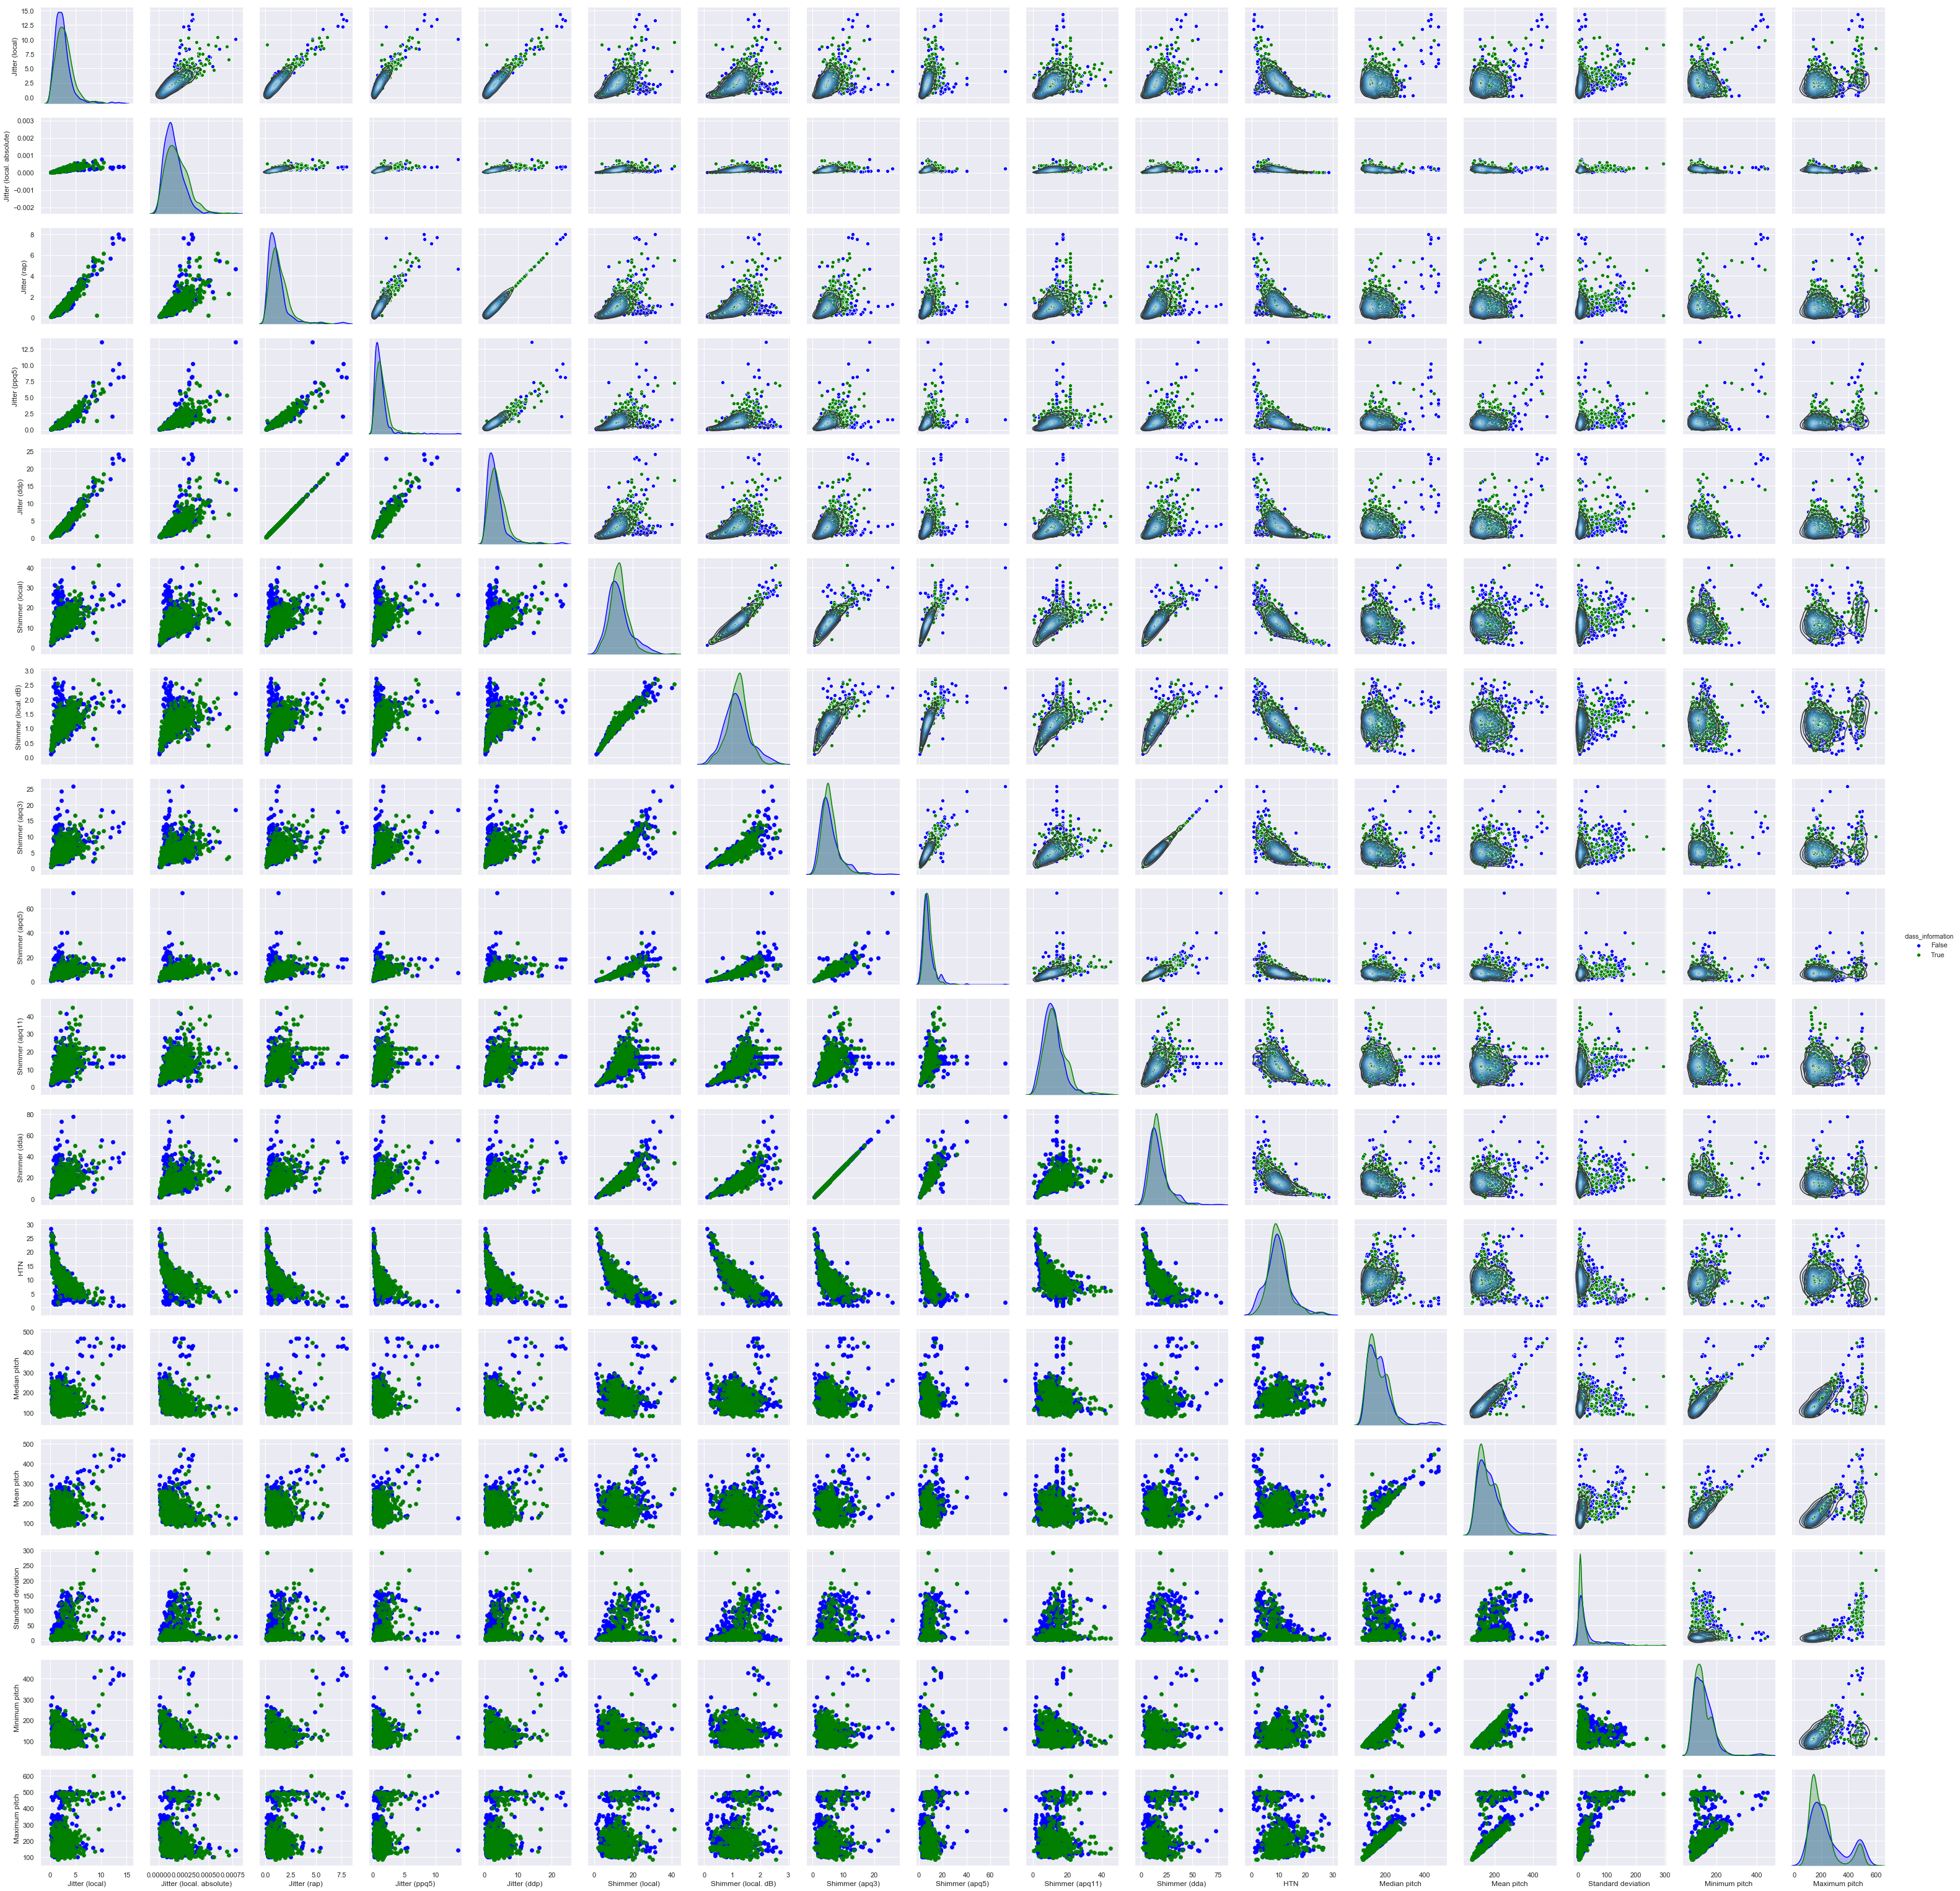

In [12]:
g = sns.pairplot(df_new,vars=df_new.drop(columns=['class_information',"UPDRS"]).columns, hue='class_information',palette={True: "green", False: "blue"})
#g = sns.pairplot(df_new, vars=df_new.drop(columns='sex').columns, hue="sex")
#g.map_diag(plt.hist)
g.map_lower(sns.regplot,fit_reg=False)
g.map_upper(sns.kdeplot, cmap="Blues_d")
#g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);
plt.show()

# Statistical analysis

First lets import the modules required for statistical tests

In [13]:
from scipy.stats import chi2_contingency

Since the target variable is a categorical variable, we can use the chi square test for determining the import features. However, for this we first need to convert the continuous variables into categorical variables. In order to do this, we shall put the values into bins. In order to get the best number of bins, we use the Freedman-Diaconis formula

In [14]:
_,bins_edges = np.histogram(df_new.iloc[:,0],bins='fd')
bins_edges,len(bins_edges)

(array([ 0.19      ,  0.56331579,  0.93663158,  1.30994737,  1.68326316,
         2.05657895,  2.42989474,  2.80321053,  3.17652632,  3.54984211,
         3.92315789,  4.29647368,  4.66978947,  5.04310526,  5.41642105,
         5.78973684,  6.16305263,  6.53636842,  6.90968421,  7.283     ,
         7.65631579,  8.02963158,  8.40294737,  8.77626316,  9.14957895,
         9.52289474,  9.89621053, 10.26952632, 10.64284211, 11.01615789,
        11.38947368, 11.76278947, 12.13610526, 12.50942105, 12.88273684,
        13.25605263, 13.62936842, 14.00268421, 14.376     ]), 39)

As we see above, we get 39 different bins with minimum loss of the data

Lets create a new dataframe for the analysis

In [15]:
stats_df = df_new.copy()
for x in stats_df.drop(columns = ["class_information","UPDRS"]).columns:
    _,bins_edges = np.histogram(stats_df.loc[:,x],bins='fd')
    bins_edges,len(bins_edges)
    stats_df.loc[:,x] = pd.cut(stats_df.loc[:,x],bins=bins_edges).astype('str')
stats_df

Jitter (local) Jitter (local. absolute)    Jitter (rap)   Jitter (ppq5)  \
0      (1.31, 1.683]     (8.35e-05, 0.000109]  (0.838, 1.032]  (0.684, 0.885]   
1     (0.563, 0.937]     (3.22e-05, 5.78e-05]   (0.256, 0.45]  (0.282, 0.483]   
2      (0.937, 1.31]     (5.78e-05, 8.35e-05]  (0.644, 0.838]  (0.483, 0.684]   
3      (2.43, 2.803]     (0.000109, 0.000135]  (1.032, 1.226]  (1.487, 1.688]   
4      (3.177, 3.55]     (0.000161, 0.000186]  (1.614, 1.808]  (1.487, 1.688]   
5      (2.43, 2.803]     (0.000109, 0.000135]   (1.226, 1.42]  (1.286, 1.487]   
6      (1.31, 1.683]     (5.78e-05, 8.35e-05]  (0.644, 0.838]  (0.684, 0.885]   
7     (1.683, 2.057]     (8.35e-05, 0.000109]  (0.838, 1.032]  (0.885, 1.086]   
8      (2.057, 2.43]     (0.000109, 0.000135]   (1.226, 1.42]  (1.487, 1.688]   
9      (1.31, 1.683]     (8.35e-05, 0.000109]  (0.838, 1.032]  (0.885, 1.086]   
10     (2.057, 2.43]     (0.000109, 0.000135]  (1.032, 1.226]  (1.086, 1.286]   
11    (1.683, 2.057]     (8.35e-05, 0.000109]  (0.644, 0.838]  (0.885, 1.086]   
12     (2.057, 2.43]     (0.000109, 0.000135]  (0.838, 1.032]  (0.885, 1.086]   
13     (3.177, 3.55]     (0.000161, 0.000186]   (1.226, 1.42]  (1.688, 1.889]   
14    (1.683, 2.057]     (8.35e-05, 0.000109]  (0.838, 1.032]  (1.086, 1.286]   
15     (2.43, 2.803]     (0.000109, 0.000135]  (1.032, 1.226]  (1.286, 1.487]   
16     (3.177, 3.55]     (0.000135, 0.000161]   (1.42, 1.614]  (1.688, 1.889]   
17     (5.416, 5.79]     (0.000238, 0.000263]   (2.196, 2.39]  (3.095, 3.296]   
18     (0.937, 1.31]     (3.22e-05, 5.78e-05]   (0.45, 0.644]  (0.483, 0.684]   
19     (2.057, 2.43]     (8.35e-05, 0.000109]  (1.032, 1.226]  (0.885, 1.086]   
20     (1.31, 1.683]     (5.78e-05, 8.35e-05]   (0.45, 0.644]  (0.282, 0.483]   
21     (2.43, 2.803]     (0.000135, 0.000161]  (1.032, 1.226]  (1.286, 1.487]   
22    (3.923, 4.296]     (0.000186, 0.000212]  (1.808, 2.002]   (2.09, 2.291]   
23     (2.057, 2.43]     (8.35e-05, 0.000109]  (0.838, 1.032]  (1.286, 1.487]   
24    (1.683, 2.057]     (5.78e-05, 8.35e-05]  (0.644, 0.838]  (0.684, 0.885]   
25     (2.43, 2.803]     (0.000109, 0.000135]   (1.226, 1.42]  (1.286, 1.487]   
26     (0.19, 0.563]     (3.22e-05, 5.78e-05]  (0.062, 0.256]  (0.081, 0.282]   
27    (0.563, 0.937]     (5.78e-05, 8.35e-05]   (0.45, 0.644]  (0.483, 0.684]   
28     (0.937, 1.31]     (8.35e-05, 0.000109]  (0.644, 0.838]  (0.483, 0.684]   
29    (2.803, 3.177]     (0.000238, 0.000263]   (1.226, 1.42]  (1.286, 1.487]   
...              ...                      ...             ...             ...   
1010   (2.057, 2.43]     (0.000109, 0.000135]  (0.838, 1.032]  (0.885, 1.086]   
1011  (0.563, 0.937]     (3.22e-05, 5.78e-05]   (0.256, 0.45]  (0.282, 0.483]   
1012   (2.057, 2.43]     (0.000109, 0.000135]   (1.226, 1.42]  (1.286, 1.487]   
1013   (2.057, 2.43]     (0.000135, 0.000161]   (1.226, 1.42]  (1.688, 1.889]   
1014   (0.19, 0.563]     (3.22e-05, 5.78e-05]  (0.062, 0.256]  (0.081, 0.282]   
1015   (4.296, 4.67]      (0.000315, 0.00034]  (2.584, 2.778]  (1.688, 1.889]   
1016   (1.31, 1.683]     (8.35e-05, 0.000109]  (0.838, 1.032]  (0.483, 0.684]   
1017  (2.803, 3.177]     (0.000212, 0.000238]  (1.032, 1.226]  (1.086, 1.286]   
1018   (3.55, 3.923]     (0.000289, 0.000315]  (1.614, 1.808]  (1.487, 1.688]   
1019   (3.177, 3.55]     (0.000263, 0.000289]  (1.614, 1.808]   (1.889, 2.09]   
1020  (1.683, 2.057]     (0.000135, 0.000161]   (0.45, 0.644]  (0.885, 1.086]   
1021   (1.31, 1.683]     (8.35e-05, 0.000109]   (0.256, 0.45]  (0.282, 0.483]   
1022   (3.55, 3.923]     (0.000263, 0.000289]  (1.614, 1.808]  (1.688, 1.889]   
1023   (2.43, 2.803]     (0.000186, 0.000212]  (0.838, 1.032]  (0.885, 1.086]   
1024  (1.683, 2.057]     (0.000135, 0.000161]  (0.644, 0.838]  (0.483, 0.684]   
1025   (2.057, 2.43]     (0.000161, 0.000186]  (1.032, 1.226]  (1.086, 1.286]   
1026   (2.43, 2.803]     (0.000212, 0.000238]  (0.838, 1.032]  (0.885, 1.086]   
1027   (3.177, 3.55]     (0.000186, 0

#### Now that we have categorical variables, we can proceed with the chi square test of independence. The hypothesis is as follows:-
* Null Hypothesis : There is no relationship between the two variables
* Alternate hypothesis : There is a relationship between the two variables

After performing the chi square test, we look at the p value and decide if the value is significant or not. We will go ahead with the standard confidence limit alpha = 0.05. So if p value is less than 0.05, then we can reject the null hypothesis.<br>
Since there are multiple columns, lets build a simple wrapper function to perform the test on all the required columns at once.

In [16]:
def chi_square_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the Chi square test of independence of all the columns with the target variable.
    This test is generally used for comparing two categorical variables.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    alpha
    '''
    if columns == None:
        columns=[x for x in df.columns if df[x].dtype=='object']
    for column in columns:
        assert df[column].dtype == 'object',"This function is intended for categorical indipendent variables"
    useful_columns = []
    for column in columns:
            if column == target:
                continue
            print("For "+column+" :-")
            cros = pd.crosstab(stats_df.loc[:,column],stats_df.loc[:,target])
            res = chi2_contingency(cros)
            if verbose:
                print(res)
            if res[1] < alpha :
                print("Reject null hypothesis\n--------------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n--------------------")
    print("According to the test, the useful columns are :-\n"+", ".join(useful_columns))

Lets perform the test and see which columns are useful

In [17]:
chi_square_wrapper(stats_df,'class_information')

For Jitter (local) :-
Reject null hypothesis
--------------------
For Jitter (local. absolute) :-
Reject null hypothesis
--------------------
For Jitter (rap) :-
Reject null hypothesis
--------------------
For Jitter (ppq5) :-
Reject null hypothesis
--------------------
For Jitter (ddp) :-
Reject null hypothesis
--------------------
For Shimmer (local) :-
Reject null hypothesis
--------------------
For Shimmer (local. dB) :-
Reject null hypothesis
--------------------
For Shimmer (apq3) :-
Reject null hypothesis
--------------------
For Shimmer (apq5) :-
Reject null hypothesis
--------------------
For  Shimmer (apq11) :-
Reject null hypothesis
--------------------
For Shimmer (dda) :-
Reject null hypothesis
--------------------
For HTN :-
Reject null hypothesis
--------------------
For Median pitch :-
Reject null hypothesis
--------------------
For Mean pitch :-
Reject null hypothesis
--------------------
For Standard deviation :-
Reject null hypothesis
--------------------
For Minimum

In [18]:
del(stats_df)

The Chi square test shows these columns are significant. Now lets proceed to build the model.

# Model Building

First import the required modules

In [19]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, Normalizer
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

There are certain preprocessing steps that help some model perform better. Lets create a wrapper for the pipeline creation for this.

In [20]:
def create_pipe_model(model,scale=preprocessing.Normalizer()):
    '''
    Returns a pipeline with the 4 steps:-
    1)Scaling the data
    2)Feature selection or dimentionality reducion
    3)Regression
    '''
    return Pipeline([
                  ('scale',scale),
                  ('feature_selection', SelectFromModel(model)),
                  ('Classification', model)
                    ])
def run_model(pipe,param_dict,verbose=True,n_jobs=4,n_iter=100):
    '''
    pipe -> The pipeline or the model for which we want the randomised search to run
    param_dict -> The dictionary of parameters.
    Note : for parameter of a particular stage of a pipleline, use stage_name__param_name as the key. For example Classification__kernel for the classification stage kernel parameter
    '''
    clf = GridSearchCV(pipe,param_dict,verbose=verbose,n_jobs=n_jobs,error_score=0.0,scoring='accuracy').fit(X_train,y_train)
    print("Training score : ",clf.score(X_train,y_train))
    print("Testing score : ",clf.score(X_test,y_test))
    print("Best params : ",clf.best_params_)
    return clf

Now that the pipline wrapper is ready, lets segregate the features and targets and create the training and testing sets

In [21]:
targets=df_new['class_information']
features = df_new.drop(columns=['class_information','UPDRS'])
features.head()

Jitter (local)  Jitter (local. absolute)  Jitter (rap)  Jitter (ppq5)  \
0           1.488                  0.000090         0.900          0.794   
1           0.728                  0.000038         0.353          0.376   
2           1.220                  0.000074         0.732          0.670   
3           2.502                  0.000123         1.156          1.634   
4           3.509                  0.000167         1.715          1.539   

   Jitter (ddp)  Shimmer (local)  Shimmer (local. dB)  Shimmer (apq3)  \
0         2.699            8.334                0.779           4.517   
1         1.059            5.864                0.642           2.058   
2         2.196            8.719                0.875           4.347   
3         3.469           13.513                1.273           5.263   
4         5.145            9.112                1.040           3.102   

   Shimmer (apq5)   Shimmer (apq11)  Shimmer (dda)     HTN  Median pitch  \
0           4.609             6.802         13.551  11.130       166.533   
1           3.180             7.194          6.175  17.403       195.252   
2           5.166             7.548         13.040  12.212       158.689   
3           8.771            16.779         15.789  11.384       201.997   
4           4.927            12.823          9.307  10.653       211.887   

   Mean pitch  Standard deviation  Minimum pitch  Maximum pitch  
0     164.781              10.421        142.229        187.576  
1     193.289              14.773        159.515        234.505  
2     164.768              12.981        146.445        211.442  
3     203.471              10.853        182.713        220.230  
4     208.440              11.499        182.821        225.162

In [22]:
targets.head()

0    True
1    True
2    True
3    True
4    True
Name: class_information, dtype: bool

The stratify option allows to get equal split of classes in training and testing sets

In [23]:
X_train,X_test,y_train,y_test = train_test_split(features,targets,random_state=2,test_size=0.3,stratify=targets)

In [24]:
clfs = {}  #stores all the models
scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer(),Normalizer(),None]

## Now that the features are ready, let's start building the models

### Models considered are:-
<ol>
    <li> Naive Bayes </li>
    <li> Logistic Regression </li>
    <li> Decision Tree</li>
    <li> Nearest Neighbours</li>
    <li> SVM </li> 
    <li> Neural Networks </li>
</ol>

### And some ensembles such as :-
<ol>
    <li> Random Forest</li>
    <li> Extra trees</li>
    <li> Ada boost</li>
    <li> Gradient boost</li>
    <li> Bagging estimators</li>
    <li> XG boost </li>        
</ol>

For each of the models, we will use the grid search to find the best possible hyperparameters. It is computationally expensive but we will not miss out on any model beacuse of poor hyperparameter tuning. Let's also calculate the total time taken to train the models using this method. Time taken for individual models is also displayed. 

In [25]:
from time import time
start_time = time()

### Naive Bayes

In [26]:
model = GaussianNB()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection
}
pipe = create_pipe_model(model)
clfs["Naive_Bayes"] = run_model(pipe,params,n_iter=30)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    4.6s finished


Training score :  0.6222527472527473
Testing score :  0.6506410256410257
Best params :  {'feature_selection': PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


### Logistic Regression

In [27]:
model = LogisticRegression()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__penalty' : ['l1','l2'],
    'Classification__C' : [x for x in range(1,5)],
    'Classification__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
pipe = create_pipe_model(model)
clfs["Logistic_regression"] = run_model(pipe,params)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 3600 out of 3600 | elapsed:   19.4s finished


Training score :  0.657967032967033
Testing score :  0.6506410256410257
Best params :  {'Classification__C': 3, 'Classification__penalty': 'l1', 'Classification__solver': 'saga', 'feature_selection': None, 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


### Decision trees

In [28]:
model = DecisionTreeClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__criterion' : ['gini','entropy'],
    'Classification__splitter' : ["best",'random'],
    'Classification__max_depth' : [x for x in range(8,20,3)]+[None],
    'Classification__max_features' : ['auto','sqrt','log2',None],
    'Classification__min_samples_split' : [x for x in range(2,10,2)],
}
clfs["Decision_tree"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 9600 candidates, totalling 28800 fits


[Parallel(n_jobs=4)]: Done  86 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 3938 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 10438 tasks      | elapsed:   45.8s
[Parallel(n_jobs=4)]: Done 19538 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 28800 out of 28800 | elapsed:  2.6min finished


Training score :  0.9862637362637363
Testing score :  0.6698717948717948
Best params :  {'Classification__criterion': 'gini', 'Classification__max_depth': 14, 'Classification__max_features': None, 'Classification__min_samples_split': 2, 'Classification__splitter': 'random', 'feature_selection': SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        norm_order=1, prefit=False, threshold=None), 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


### Nearest Neighbours

In [29]:
model = KNeighborsClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__n_neighbors' : [x for x in range(1,10,2)],
    'Classification__algorithm' : ['auto', 'ball_tree', 'brute','kd_tree']
}
clfs["K_nearest"] = run_model(pipe,params,verbose=True)  #Setting n_jobs as 6 so that i can continue working on my system without any lag:P

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:    4.0s


Training score :  0.7431318681318682
Testing score :  0.6378205128205128
Best params :  {'Classification__algorithm': 'auto', 'Classification__n_neighbors': 7, 'feature_selection': None, 'scale': None}


[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:   17.2s finished


### SVM

In [30]:
model = SVC(probability=True,verbose=True)
feature_selection = [None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__C' : [x for x in range(1,10,2)],
    #'Classification__kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
}
clfs["SVM"] = run_model(pipe,params,verbose=True,n_iter=10,n_jobs=2)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=2)]: Done  65 tasks      | elapsed:    5.0s
[Parallel(n_jobs=2)]: Done 365 tasks      | elapsed:   20.6s
[Parallel(n_jobs=2)]: Done 375 out of 375 | elapsed:   21.4s finished


[LibSVM]Training score :  0.7884615384615384
Testing score :  0.6378205128205128
Best params :  {'Classification__C': 7, 'feature_selection': None, 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}


### Neural networks

In [31]:
model = MLPClassifier()
feature_selection = [None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__hidden_layer_sizes' : [(100,200,250,400),(100,),(200,360,300)],
    'Classification__activation': ["logistic", "relu", "tanh",'identity'],
}
clfs["Neural_networks"] = run_model(pipe,params,verbose=True,n_iter=100)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 835 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:  9.3min finished


Training score :  0.9601648351648352
Testing score :  0.6602564102564102
Best params :  {'Classification__activation': 'relu', 'Classification__hidden_layer_sizes': (100, 200, 250, 400), 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


### Random Forest

In [32]:
model = RandomForestClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__n_estimators' : [10,100,500,1000,1500,2000,3000],#[x for x in range(10,5000,100)],
    'Classification__criterion' : ['gini','entropy'],
    'Classification__max_depth' : [x for x in range(8,15,4)]+[None],
    'Classification__max_features' : ['auto','sqrt','log2',None],
    'Classification__bootstrap' : [True,False],
}
clfs["Random_forest"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 10080 candidates, totalling 30240 fits


[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 317 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 567 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 1038 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 1527 tasks      | elapsed: 14.5min
[Parallel(n_jobs=4)]: Done 2111 tasks      | elapsed: 26.0min
[Parallel(n_jobs=4)]: Done 2778 tasks      | elapsed: 40.4min
[Parallel(n_jobs=4)]: Done 3696 tasks      | elapsed: 51.1min
[Parallel(n_jobs=4)]: Done 4764 tasks      | elapsed: 61.0min
[Parallel(n_jobs=4)]: Done 5963 tasks      | elapsed: 74.9min
[Parallel(n_jobs=4)]: Done 7217 tasks      | elapsed: 87.5min
[Parallel(n_jobs=4)]: Done 8556 tasks      | elapsed: 104.1min
[Parallel(n_jobs=4)]: Done 10016 tasks      | elapsed: 126.1min
[Parallel(n_jobs=4)]: Done 11609 tasks      | elapsed: 146.1min
[Parallel(n_jobs=4)]: Done 13176 tasks      | elapsed: 172.9min
[Parallel(n_jobs=4)]: Done 14988 tasks      | elapsed: 196.5min
[P

Training score :  1.0
Testing score :  0.7243589743589743
Best params :  {'Classification__bootstrap': True, 'Classification__criterion': 'entropy', 'Classification__max_depth': None, 'Classification__max_features': 'log2', 'Classification__n_estimators': 100, 'feature_selection': None, 'scale': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)}


### Extra trees 

In [33]:
model = ExtraTreesClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__n_estimators' : [10,100,500,1000,1500,2000,3000],
    'Classification__criterion' : ['gini','entropy'],
    'Classification__max_depth' : [x for x in range(8,15,4)]+[None],
    'Classification__max_features' : ['auto','sqrt','log2',None],
    'Classification__bootstrap' : [True,False],
}
clfs["Extra_trees"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 10080 candidates, totalling 30240 fits


[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 444 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 860 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 1232 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 1890 tasks      | elapsed: 11.8min
[Parallel(n_jobs=4)]: Done 2793 tasks      | elapsed: 16.5min
[Parallel(n_jobs=4)]: Done 3620 tasks      | elapsed: 22.2min
[Parallel(n_jobs=4)]: Done 4713 tasks      | elapsed: 29.3min
[Parallel(n_jobs=4)]: Done 5950 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done 7305 tasks      | elapsed: 47.7min
[Parallel(n_jobs=4)]: Done 8764 tasks      | elapsed: 58.7min
[Parallel(n_jobs=4)]: Done 10513 tasks      | elapsed: 69.4min
[Parallel(n_jobs=4)]: Done 12301 tasks      | elapsed: 81.4min
[Parallel(n_jobs=4)]: Done 14107 tasks      | elapsed: 94.8min
[Parallel(n_jobs=4)]: Done 16094 tasks      | elapsed: 108.8min
[Parallel(n_jobs=4)]: Done 18141 tasks      | elapsed: 122.4min
[Par

Training score :  1.0
Testing score :  0.6538461538461539
Best params :  {'Classification__bootstrap': False, 'Classification__criterion': 'gini', 'Classification__max_depth': None, 'Classification__max_features': 'log2', 'Classification__n_estimators': 100, 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': None}


### ADA Boost

In [34]:
model = AdaBoostClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__n_estimators' : [10,100,500,1000,1500,2000,3000],
    'Classification__base_estimator' : [GaussianNB(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC()],
}
clfs["Ada_boost"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 1050 candidates, totalling 3150 fits


[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 408 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 658 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 1165 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 3150 out of 3150 | elapsed: 10.5min finished


Training score :  0.6497252747252747
Testing score :  0.6602564102564102
Best params :  {'Classification__base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'Classification__n_estimators': 3000, 'feature_selection': None, 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


### Gradient Boost

In [35]:
model = GradientBoostingClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__n_estimators' : [10,100,500,1000,1500,2000,3000],
    'Classification__loss' : ['deviance', 'exponential'],
    'Classification__max_depth' : [x for x in range(3,15,4)]
}
clfs["Gradient_boost"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=4)]: Done  94 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 566 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1013 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1475 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 1942 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done 3107 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 3780 out of 3780 | elapsed: 11.8min finished


Training score :  1.0
Testing score :  0.7051282051282052
Best params :  {'Classification__loss': 'exponential', 'Classification__max_depth': 7, 'Classification__n_estimators': 500, 'feature_selection': SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
        norm_order=1, prefit=False, threshold=None), 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}


### Bagging Estimator

In [36]:
model = BaggingClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__n_estimators' : [10,100,500,1000,1500,2000,3000],
    'Classification__base_estimator' : [GaussianNB(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC()],
}
clfs["Ada_boost"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 1050 candidates, totalling 3150 fits


[Parallel(n_jobs=4)]: Done  71 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 458 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 925 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 1275 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done 1765 tasks      | elapsed: 15.2min
[Parallel(n_jobs=4)]: Done 2423 tasks      | elapsed: 25.6min
[Parallel(n_jobs=4)]: Done 3080 tasks      | elapsed: 47.4min
[Parallel(n_jobs=4)]: Done 3150 out of 3150 | elapsed: 57.6min finished


Training score :  1.0
Testing score :  0.7115384615384616
Best params :  {'Classification__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'Classification__n_estimators': 500, 'feature_selection': None, 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}


### XG BOOST

In [37]:
model = XGBClassifier()
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__n_estimators' : [10,100,500,1000,1500,2000,3000],
    'Classification__max_depth' : [x for x in range(3,15,4)],
    'Classification__booster' : ['gbtree', 'gblinear','dart']
}
clfs["XGboost"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 1890 candidates, totalling 5670 fits


[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 618 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1130 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1848 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 4313 tasks      | elapsed: 24.9min
[Parallel(n_jobs=4)]: Done 5001 tasks      | elapsed: 104.8min
[Parallel(n_jobs=4)]: Done 5670 out of 5670 | elapsed: 198.3min finished


Training score :  1.0
Testing score :  0.7083333333333334
Best params :  {'Classification__booster': 'gbtree', 'Classification__max_depth': 3, 'Classification__n_estimators': 2000, 'feature_selection': None, 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Voting Classifier

In [38]:
model = VotingClassifier([('gb',GaussianNB()),('lr',LogisticRegression()),('knn',KNeighborsClassifier()),('dt',DecisionTreeClassifier()),('svm',SVC(probability=True))])
feature_selection = [SelectFromModel(model),None]+[PCA(x) for x in range(1,11,3)]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Classification__voting' : ['hard','soft'],
    'Classification__estimators':[[('gb',GaussianNB()),('lr',LogisticRegression()),('knn',KNeighborsClassifier()),('dt',DecisionTreeClassifier()),('svm',SVC(probability=True))]]
}
#clfs["Voting_classifier"] = run_model(pipe,params,verbose=True)
Voting_classifier = run_model(pipe,params,verbose=True,n_iter=60)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s


Training score :  0.8021978021978022
Testing score :  0.657051282051282
Best params :  {'Classification__estimators': [('gb', GaussianNB(priors=None)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('svm', SVC(C=1.0, cache_size=200, class_

[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    7.4s finished
d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Finally,
### Let's try the ensemble of all the classifier considered so far

In [39]:
class ensemble(object):
    """Stripped-down version of VotingClassifier that uses prefit estimators"""
    def __init__(self, estimators, voting='hard', weights=None):
        self.estimators = [e[1] for e in estimators]
        self.named_estimators = dict(estimators)
        self.voting = voting
        self.weights = weights

    def fit(self, X, y, sample_weight=None):
        raise NotImplementedError
        
    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        maj : array-like, shape = [n_samples]
            Predicted class labels.
        """

        #check_is_fitted(self, 'estimators')
        if self.voting == 'soft':
            maj = np.argmax(self.predict_proba(X), axis=1)

        else:  # 'hard' voting
            predictions = self._predict(X)
            maj = np.apply_along_axis(lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions.astype('int'))
        return maj

    def _collect_probas(self, X):
        """Collect results from clf.predict calls. """
        return np.asarray([clf.predict_proba(X) for clf in self.estimators])

    def _predict_proba(self, X):
        """Predict class probabilities for X in 'soft' voting """
        if self.voting == 'hard':
            raise AttributeError("predict_proba is not available when"
                                 " voting=%r" % self.voting)
        avg = np.average(self._collect_probas(X), axis=0, weights=self.weights)
        return avg

    @property
    def predict_proba(self):
        """Compute probabilities of possible outcomes for samples in X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.
        """
        return self._predict_proba

    def transform(self, X):
        """Return class labels or probabilities for X for each estimator.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        -------
        If `voting='soft'`:
          array-like = [n_classifiers, n_samples, n_classes]
            Class probabilities calculated by each classifier.
        If `voting='hard'`:
          array-like = [n_samples, n_classifiers]
            Class labels predicted by each classifier.
        """
        if self.voting == 'soft':
            return self._collect_probas(X)
        else:
            return self._predict(X)

    def _predict(self, X):
        """Collect results from clf.predict calls. """
        return np.asarray([clf.predict(X) for clf in self.estimators]).T

In [40]:
model = ensemble([(a,b) for a,b in clfs.items()])
yhat = model.predict(X_test)
y = y_test
print("Hard voting accuracy :-",accuracy_score(y,yhat))

Hard voting accuracy :- 0.7275641025641025


d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
end_time = time()
print("Total time taken is",datetime.timedelta(seconds=end_time-start_time))

Total time taken is 15:41:10.445472


In [43]:
from sklearn.externals import joblib
models_path = "../Models/Classification/"
for x,y in clfs.items():
    joblib.dump(y,models_path + x +".pkl")

### Now let's visualise these results

Importing additional required modules

In [44]:
import pandas_ml
import scikitplot as skplt

For visualizations, we will consider the roc curve and the confusion matrix

In [50]:
def show_roc_cm(clf,X_test,y_test,verbose=True,clf_name=None):
    if clf_name:
        print("Stats of",clf_name)
    skplt.metrics.plot_roc(list(y_test),list(clf.predict_proba(X_test)))
    cm = pandas_ml.ConfusionMatrix(list(y_test),list(clf.predict(X_test)))
    cm.plot()
    if verbose:
        cm.print_stats()
    plt.show()

Stats of Naive_Bayes
population: 312
P: 156
N: 156
PositiveTest: 183
NegativeTest: 129
TP: 115
TN: 88
FP: 68
FN: 41
TPR: 0.7371794871794872
TNR: 0.5641025641025641
PPV: 0.6284153005464481
NPV: 0.6821705426356589
FPR: 0.4358974358974359
FDR: 0.37158469945355194
FNR: 0.26282051282051283
ACC: 0.6506410256410257
F1_score: 0.6784660766961652
MCC: 0.3058985778539526
informedness: 0.3012820512820513
markedness: 0.3105858431821069
prevalence: 0.5
LRP: 1.6911764705882353
LRN: 0.46590909090909094
DOR: 3.6298421807747485
FOR: 0.3178294573643411


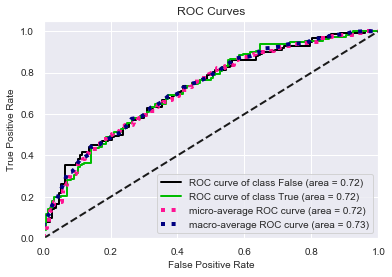

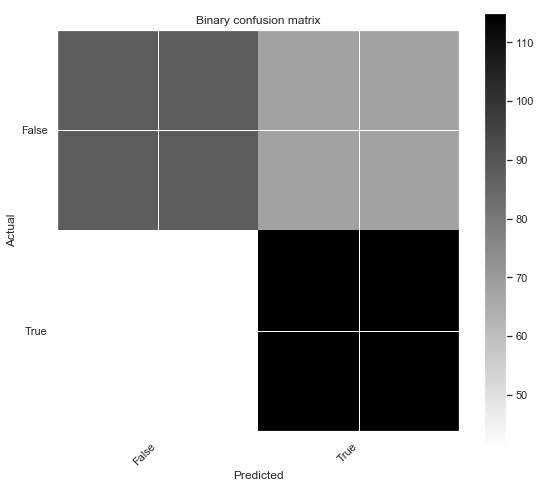

Stats of Logistic_regression
population: 312
P: 156
N: 156
PositiveTest: 175
NegativeTest: 137
TP: 111
TN: 92
FP: 64
FN: 45
TPR: 0.7115384615384616
TNR: 0.5897435897435898
PPV: 0.6342857142857142
NPV: 0.6715328467153284
FPR: 0.41025641025641024
FDR: 0.3657142857142857
FNR: 0.28846153846153844
ACC: 0.6506410256410257
F1_score: 0.6706948640483383
MCC: 0.3035418313486945
informedness: 0.3012820512820513
markedness: 0.30581856100104265
prevalence: 0.5
LRP: 1.7343750000000002
LRN: 0.48913043478260865
DOR: 3.5458333333333343
FOR: 0.3284671532846715


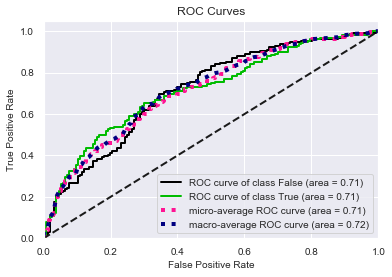

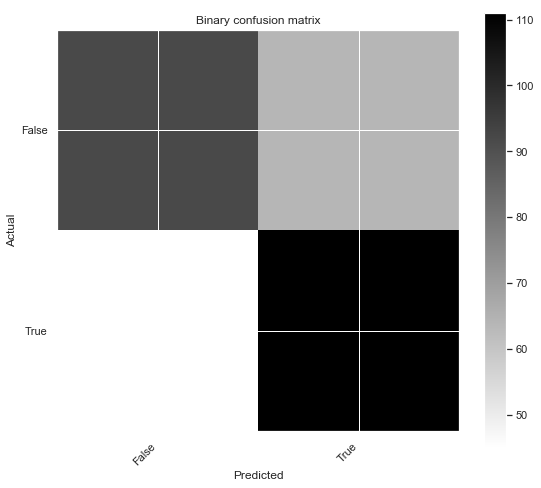

Stats of Decision_tree
population: 312
P: 156
N: 156
PositiveTest: 163
NegativeTest: 149
TP: 108
TN: 101
FP: 55
FN: 48
TPR: 0.6923076923076923
TNR: 0.6474358974358975
PPV: 0.6625766871165644
NPV: 0.6778523489932886
FPR: 0.3525641025641026
FDR: 0.3374233128834356
FNR: 0.3076923076923077
ACC: 0.6698717948717948
F1_score: 0.677115987460815
MCC: 0.34008614023642836
informedness: 0.33974358974358987
markedness: 0.340429036109853
prevalence: 0.5
LRP: 1.9636363636363634
LRN: 0.4752475247524752
DOR: 4.131818181818182
FOR: 0.3221476510067114


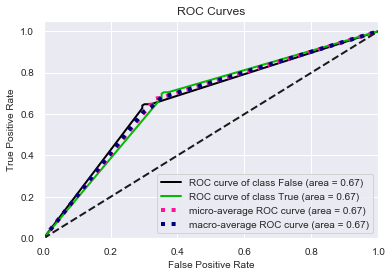

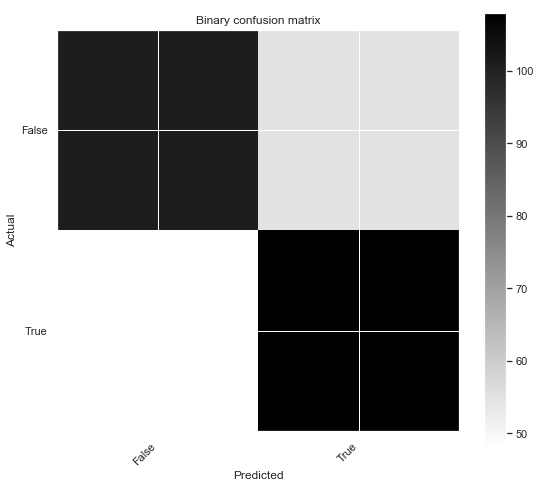

Stats of K_nearest
population: 312
P: 156
N: 156
PositiveTest: 165
NegativeTest: 147
TP: 104
TN: 95
FP: 61
FN: 52
TPR: 0.6666666666666666
TNR: 0.6089743589743589
PPV: 0.6303030303030303
NPV: 0.6462585034013606
FPR: 0.391025641025641
FDR: 0.3696969696969697
FNR: 0.3333333333333333
ACC: 0.6378205128205128
F1_score: 0.6479750778816199
MCC: 0.27610089605637533
informedness: 0.27564102564102555
markedness: 0.27656153370439096
prevalence: 0.5
LRP: 1.7049180327868851
LRN: 0.5473684210526316
DOR: 3.114754098360655
FOR: 0.35374149659863946


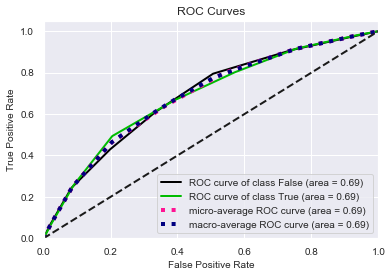

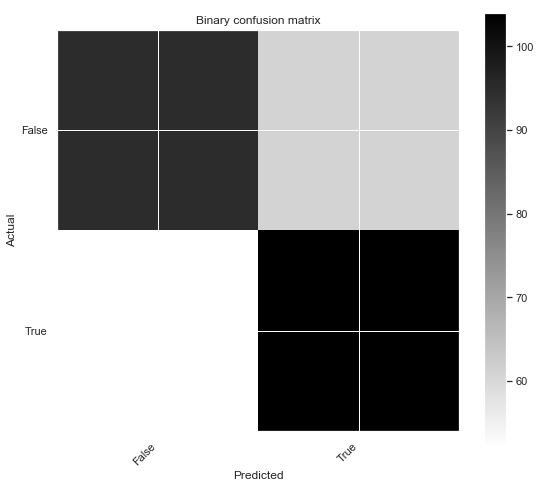

Stats of SVM
population: 312
P: 156
N: 156
PositiveTest: 169
NegativeTest: 143
TP: 106
TN: 93
FP: 63
FN: 50
TPR: 0.6794871794871795
TNR: 0.5961538461538461
PPV: 0.6272189349112426
NPV: 0.6503496503496503
FPR: 0.40384615384615385
FDR: 0.3727810650887574
FNR: 0.32051282051282054
ACC: 0.6378205128205128
F1_score: 0.6523076923076923
MCC: 0.2766031263869608
informedness: 0.27564102564102555
markedness: 0.2775685852608929
prevalence: 0.5
LRP: 1.6825396825396826
LRN: 0.5376344086021506
DOR: 3.129523809523809
FOR: 0.34965034965034963


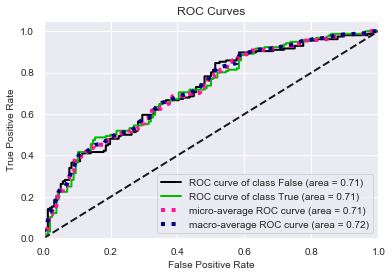

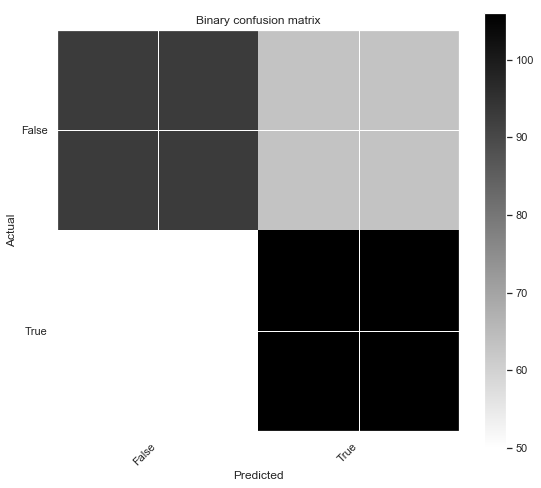

Stats of Neural_networks
population: 312
P: 156
N: 156
PositiveTest: 148
NegativeTest: 164
TP: 99
TN: 107
FP: 49
FN: 57
TPR: 0.6346153846153846
TNR: 0.6858974358974359
PPV: 0.668918918918919
NPV: 0.6524390243902439
FPR: 0.3141025641025641
FDR: 0.3310810810810811
FNR: 0.36538461538461536
ACC: 0.6602564102564102
F1_score: 0.6513157894736842
MCC: 0.3209351037269355
informedness: 0.3205128205128205
markedness: 0.3213579433091629
prevalence: 0.5
LRP: 2.020408163265306
LRN: 0.5327102803738317
DOR: 3.7926960257787323
FOR: 0.3475609756097561


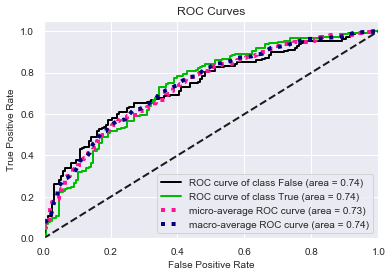

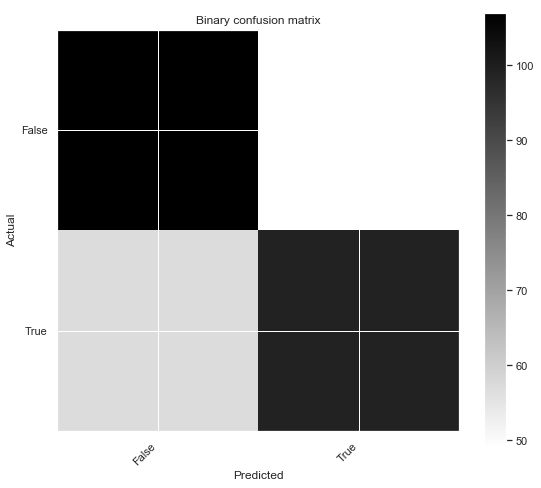

Stats of Random_forest
population: 312
P: 156
N: 156
PositiveTest: 166
NegativeTest: 146
TP: 118
TN: 108
FP: 48
FN: 38
TPR: 0.7564102564102564
TNR: 0.6923076923076923
PPV: 0.7108433734939759
NPV: 0.7397260273972602
FPR: 0.3076923076923077
FDR: 0.2891566265060241
FNR: 0.24358974358974358
ACC: 0.7243589743589743
F1_score: 0.7329192546583851
MCC: 0.44964272186146925
informedness: 0.4487179487179487
markedness: 0.450569400891236
prevalence: 0.5
LRP: 2.458333333333333
LRN: 0.35185185185185186
DOR: 6.986842105263157
FOR: 0.2602739726027397


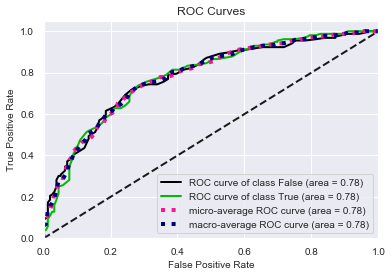

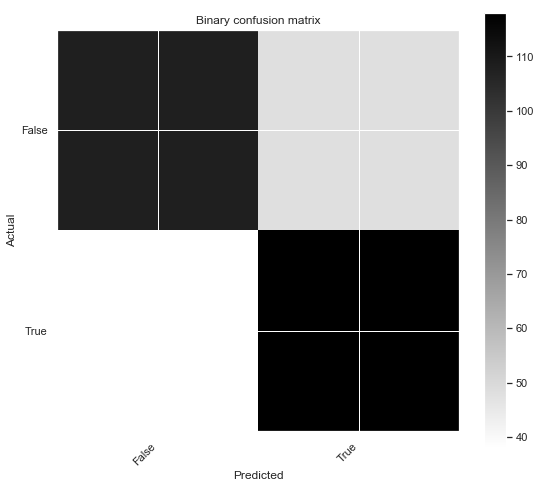

Stats of Extra_trees
population: 312
P: 156
N: 156
PositiveTest: 174
NegativeTest: 138
TP: 111
TN: 93
FP: 63
FN: 45
TPR: 0.7115384615384616
TNR: 0.5961538461538461
PPV: 0.6379310344827587
NPV: 0.6739130434782609
FPR: 0.40384615384615385
FDR: 0.3620689655172414
FNR: 0.28846153846153844
ACC: 0.6538461538461539
F1_score: 0.6727272727272727
MCC: 0.3097612370649465
informedness: 0.3076923076923077
markedness: 0.31184407796101965
prevalence: 0.5
LRP: 1.7619047619047619
LRN: 0.48387096774193544
DOR: 3.6412698412698417
FOR: 0.32608695652173914


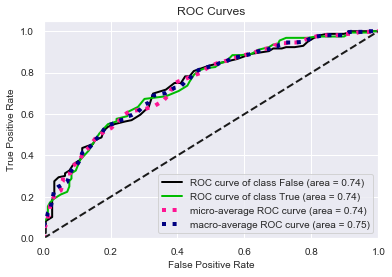

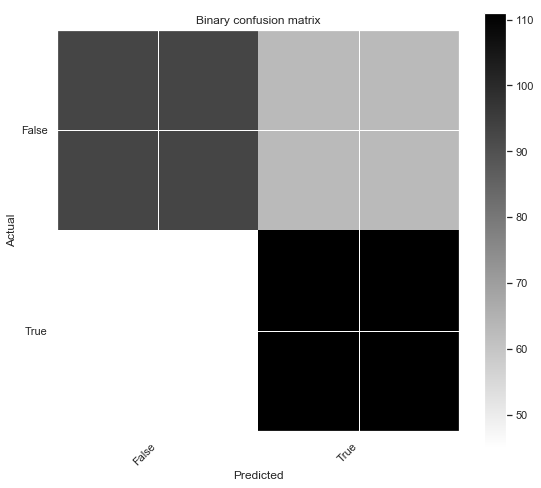

Stats of Ada_boost
population: 312
P: 156
N: 156
PositiveTest: 170
NegativeTest: 142
TP: 118
TN: 104
FP: 52
FN: 38
TPR: 0.7564102564102564
TNR: 0.6666666666666666
PPV: 0.6941176470588235
NPV: 0.7323943661971831
FPR: 0.3333333333333333
FDR: 0.3058823529411765
FNR: 0.24358974358974358
ACC: 0.7115384615384616
F1_score: 0.7239263803680982
MCC: 0.4247909959305812
informedness: 0.4230769230769229
markedness: 0.42651201325600674
prevalence: 0.5
LRP: 2.269230769230769
LRN: 0.3653846153846154
DOR: 6.210526315789473
FOR: 0.2676056338028169


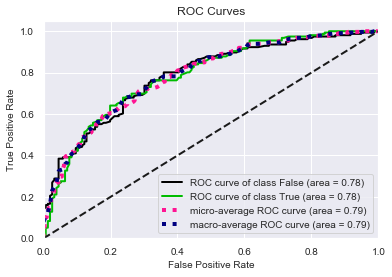

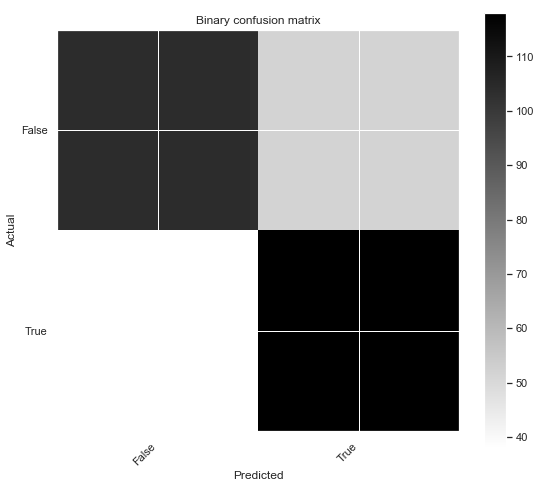

Stats of Gradient_boost
population: 312
P: 156
N: 156
PositiveTest: 164
NegativeTest: 148
TP: 114
TN: 106
FP: 50
FN: 42
TPR: 0.7307692307692307
TNR: 0.6794871794871795
PPV: 0.6951219512195121
NPV: 0.7162162162162162
FPR: 0.32051282051282054
FDR: 0.3048780487804878
FNR: 0.2692307692307692
ACC: 0.7051282051282052
F1_score: 0.7125
MCC: 0.4107969327704774
informedness: 0.41025641025641013
markedness: 0.4113381674357284
prevalence: 0.5
LRP: 2.28
LRN: 0.3962264150943396
DOR: 5.7542857142857144
FOR: 0.28378378378378377


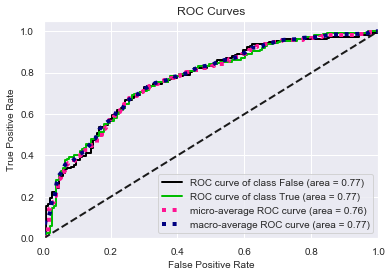

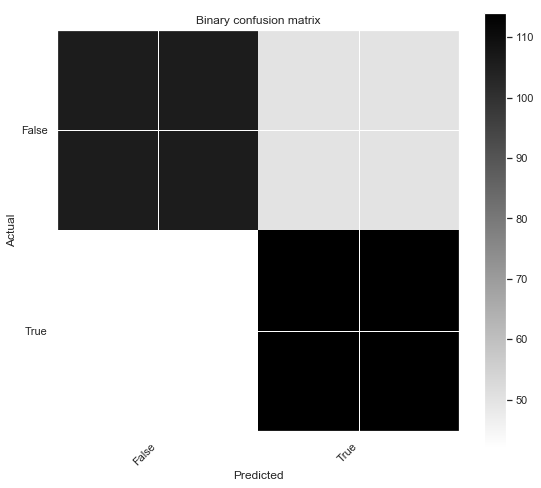

Stats of XGboost
population: 312
P: 156
N: 156
PositiveTest: 163
NegativeTest: 149
TP: 114
TN: 107
FP: 49
FN: 42
TPR: 0.7307692307692307
TNR: 0.6858974358974359
PPV: 0.6993865030674846
NPV: 0.7181208053691275
FPR: 0.3141025641025641
FDR: 0.3006134969325153
FNR: 0.2692307692307692
ACC: 0.7083333333333334
F1_score: 0.7147335423197492
MCC: 0.41708677576165737
informedness: 0.4166666666666665
markedness: 0.4175073084366121
prevalence: 0.5
LRP: 2.326530612244898
LRN: 0.3925233644859813
DOR: 5.927113702623907
FOR: 0.28187919463087246


d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


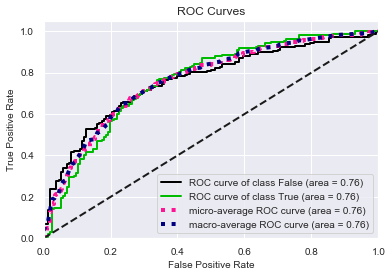

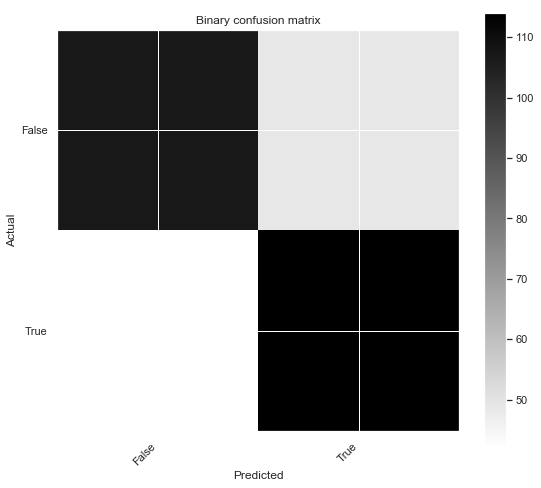

In [51]:
for x,y in clfs.items():
    show_roc_cm(y,X_test=X_test,y_test=y_test,clf_name=x)

### Additional Notes :
* **Neural Networks** - Better hyperparameter tuning can yield better results and reduce the overfitting of neural networks. Since it is very computationally expensive to train a neural network, it is suggested to use random search or use a gpu to train the neural networks(perhaps using [keras](https://pypi.org/project/Keras/))
* **Feature Extraction** - Since i was unable to acquire the actual audio samples, i was forced to extract the features available to me in the dataset so i could test this model on real world data. Perhaps, given the audio samples, i could be able to extract a better set of features(using neural networks, for more details check out [Kapre](https://github.com/keunwoochoi/transfer_learning_music)) and use that for classification.